In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/hakangurler/Desktop/Final_Task'

In [4]:
df = pd.read_csv(os.path.join(path, 'cwurData.csv'))

In [6]:
df.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [7]:
df.head(20)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,NaN,101,82.50,2012
6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,NaN,26,82.34,2012
7,8,Yale University,USA,6,14,31,12,14,6,15,NaN,66,79.14,2012
8,9,Columbia University,USA,7,23,21,10,13,12,14,NaN,5,78.86,2012
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,NaN,16,78.55,2012


In [8]:
df.shape

(2200, 14)

In [9]:
dups = df.duplicated()

In [10]:
dups.shape # No dups

(2200,)

/Users/hakangurler/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='patents', ylabel='Density'>

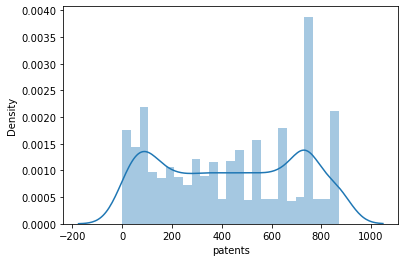

In [11]:
sns.distplot(df['patents'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [12]:
df['patents'].mean() # Check the mean

433.34636363636366

In [13]:
df['patents'].median() # Check the median

426.0

In [14]:
df['patents'].max() # Check the max

871

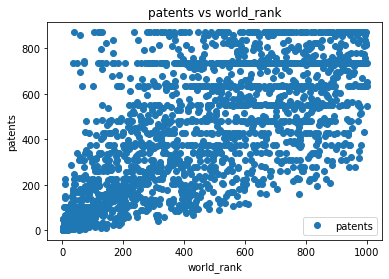

In [15]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'world_rank', y='patents',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('patents vs world_rank')  
plt.xlabel('world_rank')  
plt.ylabel('patents')  
plt.show()

In [16]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['world_rank'].values.reshape(-1,1)
y = df['patents'].values.reshape(-1,1)

In [17]:
X

array([[   1],
       [   2],
       [   3],
       ...,
       [ 998],
       [ 999],
       [1000]])

In [18]:
y

array([[  5],
       [  1],
       [ 15],
       ...,
       [824],
       [651],
       [547]])

In [19]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [21]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

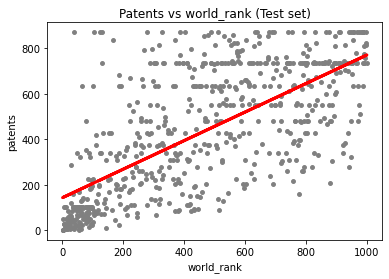

In [23]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Patents vs world_rank (Test set)')
plot_test.xlabel('world_rank')
plot_test.ylabel('patents')
plot_test.show()

In [24]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [25]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.62860467]]
Mean squared error:  40056.728951533056
R2 score:  0.47687444271679236


In [26]:
y_predicted

array([[218.9578442 ],
       [248.50226349],
       [200.72830889],
       [183.75598292],
       [475.42854779],
       [187.52761092],
       [372.96598729],
       [268.61761279],
       [298.16203207],
       [686.01111079],
       [361.02249864],
       [750.12878669],
       [562.17599165],
       [423.88296521],
       [727.49901872],
       [335.24970735],
       [763.95808933],
       [547.08947968],
       [716.18413474],
       [765.21529866],
       [569.71924764],
       [468.51389647],
       [259.81714747],
       [708.01227409],
       [640.75157486],
       [768.98692666],
       [538.28901436],
       [425.14017454],
       [354.73645198],
       [215.1862162 ],
       [611.20715558],
       [168.04086628],
       [202.61412289],
       [288.10435742],
       [555.26134033],
       [591.09180627],
       [753.27181002],
       [724.3559954 ],
       [234.04435617],
       [371.70877796],
       [203.24272756],
       [516.28785106],
       [317.64877671],
       [253

In [27]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,199,218.957844
1,839,248.502263
2,321,200.728309
3,637,183.755983
4,128,475.428548
5,61,187.527611
6,373,372.965987
7,227,268.617613
8,564,298.162032
9,737,686.011111


In [28]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [29]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [30]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.62860467]]
Mean squared error:  37775.958965950325
R2 score:  0.4921436771946819


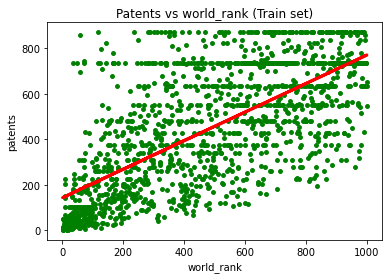

In [31]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Patents vs world_rank (Train set)')
plot_test.xlabel('world_rank')
plot_test.ylabel('patents')
plot_test.show()

In [36]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.
### Even they are not outliers for the data set, just giving a try. 

df_test = df[df['patents'] <=100]

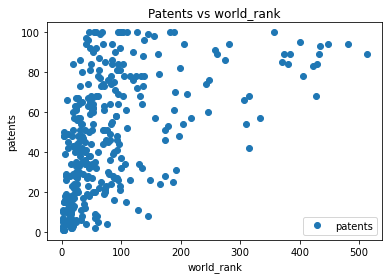

In [37]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'world_rank', y='patents', style='o')  
plt.title('Patents vs world_rank')  
plt.xlabel('world_rank')  
plt.ylabel('patents')  
plt.show()

In [38]:
# Reshape again.

X_2 = df_test['world_rank'].values.reshape(-1,1)
y_2 = df_test['patents'].values.reshape(-1,1)

In [41]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [42]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [43]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [44]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [45]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.14345625]]
Mean squared error:  688.3261822315347
R2 score:  0.2775853079354862


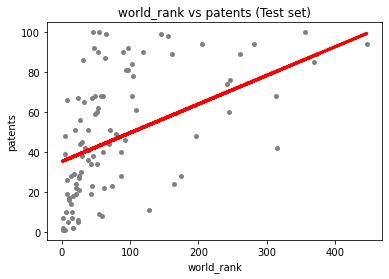

In [46]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('world_rank vs patents (Test set)')
plot_test.xlabel('world_rank')
plot_test.ylabel('patents')
plot_test.show()

In [47]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,49,46.797744
1,46,48.519219
2,40,47.801937
3,78,50.240694
4,5,38.764193
5,29,37.903456
6,90,42.924425
7,2,35.464700
8,89,88.973882
9,51,38.046912
